In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Bad key text.latex.preview in file C:\Users\maroj\Anaconda3\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\maroj\Anaconda3\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\maroj\Anaconda3\envs\mytfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the

In [2]:
data=pd.read_csv("Mobile_Industrydata.csv")

In [3]:
data.shape

(25, 6)

In [4]:
data.head()

,Company,Growth Rate,Profitability,Market Size,Product Range,Presence in International Markets
0,BBK Electronics Corp Ltd,-0.2857,0.1000,29.2,89,46
1,Xiaomi Corp,-0.1826,0.0087,17.5,29,46
2,Samsung Corp,0.0865,0.0466,17.5,58,52
3,Transsion Holdings,-0.0390,0.0470,8.8,105,12
4,Lava International Ltd,0.1271,0.0223,6.7,15,1


In [5]:
data.dtypes

Company                               object
Growth Rate                          float64
Profitability                        float64
Market Size                          float64
Product Range                          int64
Presence in International Markets      int64
dtype: object

In [6]:
X = data.drop('Company', axis=1)

In [7]:
SSE = []

In [8]:
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

C:\Users\maroj\Anaconda3\envs\mytfenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [9]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

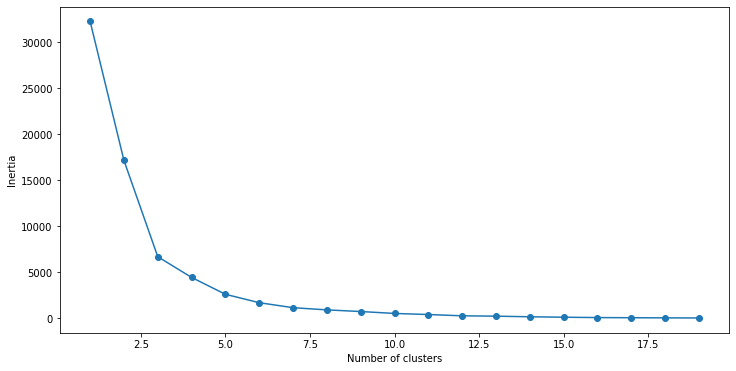

In [10]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(X)

In [12]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000
mean,4.440892e-17,1.776357e-17,-5.773160e-17,-4.440892e-17,0.000000
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621
min,-2.828985e+00,-2.859380e+00,-5.218441e-01,-7.488805e-01,-1.013788
25%,-2.378983e-01,1.736834e-01,-5.190330e-01,-6.389666e-01,-1.013788
50%,1.500809e-01,3.263806e-01,-4.375125e-01,-4.191386e-01,-0.518598
75%,4.386466e-01,4.999596e-01,-2.126281e-01,3.136212e-01,1.011987
max,1.869466e+00,1.285633e+00,3.582295e+00,3.098109e+00,1.282090


In [13]:
SSE_scaled = []

In [14]:
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

C:\Users\maroj\Anaconda3\envs\mytfenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'SSE')

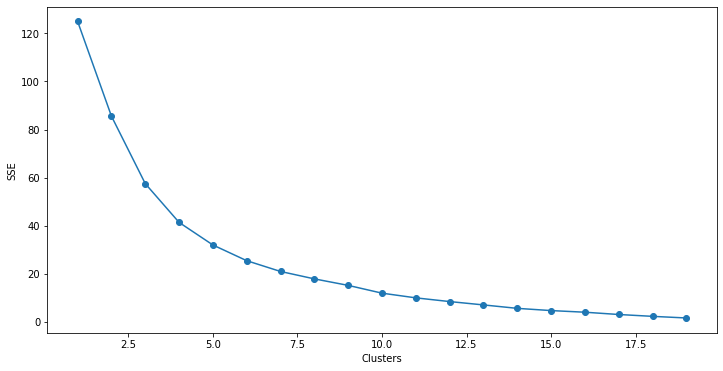

In [15]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [16]:
kmeans = KMeans(n_clusters=7, random_state=42)

In [17]:
data['Cluster'] = kmeans.fit_predict(data_scaled)

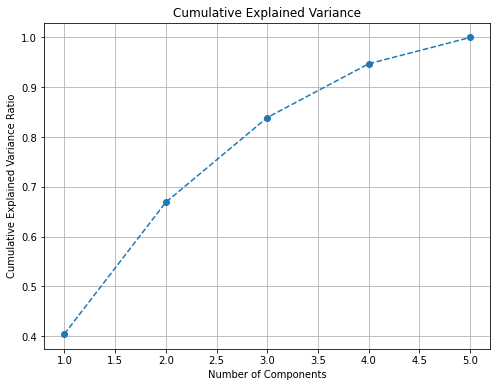

In [18]:
pca = PCA().fit(data_scaled)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [19]:
# Perform PCA with n_components = 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_scaled)

In [20]:
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]
data['PCA3'] = X_pca[:, 2]


Companies in Cluster 0:

- Reliance Jio infocomm Ltd
- Best IT World (India) Pvt Ltd
- Karbonn Mobile India Pvt Ltd

Companies in Cluster 1:

- BBK Electronics Corp Ltd
- Xiaomi Corp
- Samsung Corp

Companies in Cluster 2:

- Lava International Ltd
- Micromax Informatics Ltd
- Panasonic Corp
- Intex Technologies (India) Ltd
- Celkon Impex Pvt Ltd
- Spice Group

Companies in Cluster 3:

- Apple Inc
- Nokia Corp
- Lenovo Group Ltd
- AsusTek Computer Inc
- BlackBerry Ltd
- Huawei Technologies Co Ltd
- LG Corp

Companies in Cluster 4:

- Gionee Communication Equipment Co Ltd
- Videocon Industries Ltd
- ZTE Corp

Companies in Cluster 5:

- Maxx Moblink Pvt Ltd
- HTC Corp

Companies in Cluster 6:

- Transsion Holdings


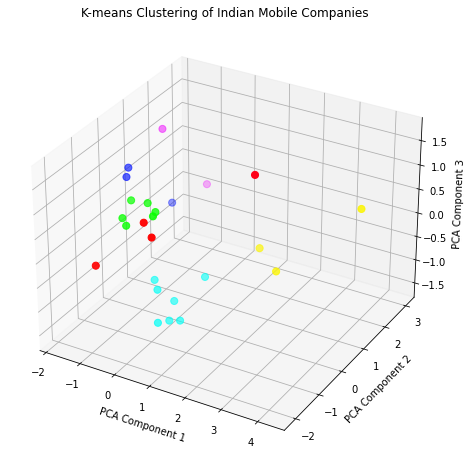

In [21]:
#Visualize the clusters using 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=data['Cluster'], cmap='hsv', s=50)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('K-means Clustering of Indian Mobile Companies')

# Print companies in each cluster
for cluster_num in range(kmeans.n_clusters):
    companies_in_cluster = data[data['Cluster'] == cluster_num]['Company'].tolist()
    print(f"\nCompanies in Cluster {cluster_num}:\n")
    for company in companies_in_cluster:
        print(f"- {company}")

plt.show()